# Cluster Analysis 

## Plotting Cluster Distributions

In [35]:
# remove `!` if running the line in a terminal
!pip install -U RelevanceAI[notebook]==2.0.0


In [ ]:
from relevanceai import Client

"""
You can sign up/login and find your credentials here: https://cloud.relevance.ai/sdk/api
Once you have signed up, click on the value under `Activation token` and paste it here
"""
client = Client()



In [ ]:
from relevanceai.utils.datasets import get_titanic_dataset

documents = get_titanic_dataset()
for i,doc in enumerate(documents):
  doc['_id']=i



In [4]:
ds = client.Dataset("titanic")
ds.insert_documents(documents)


## Clustering

In [ ]:
from sklearn.cluster import KMeans

VECTOR_FIELD = "value_vector_"
KMEAN_NUMBER_OF_CLUSTERS = 5
ALIAS = "kmeans_" + str(KMEAN_NUMBER_OF_CLUSTERS)

model = KMeans(n_clusters=KMEAN_NUMBER_OF_CLUSTERS)
clusterer = client.ClusterOps(alias=ALIAS, model=model)
clusterer.operate(dataset_id="titanic", vector_fields=["value_vector_"])




## Plot Basic Distributions

In [17]:
viz_ops = client.ClusterVizOps(
    dataset_id="titanic",
    vector_fields=["value_vector_"],
    alias="kmeans_5"
)


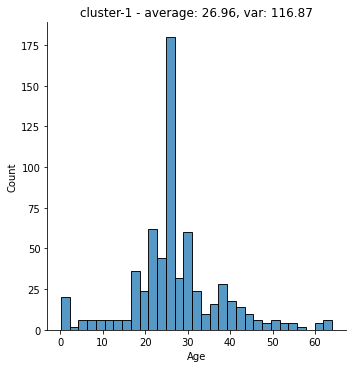

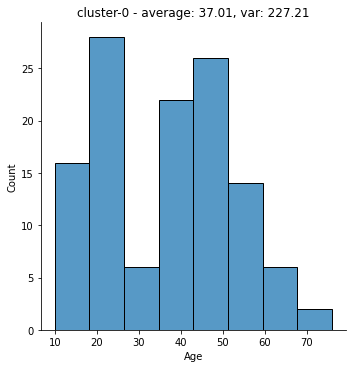

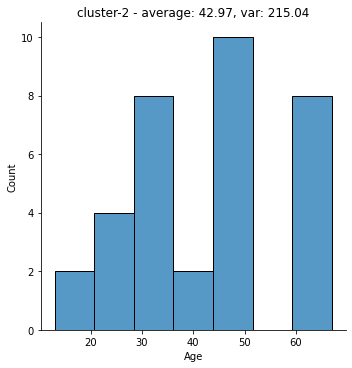

In [38]:
viz_ops.plot_distributions("Age", top_indices=3)


## Plotting Custom Distributions - Variation

  0%|          | 0/5 [00:00<?, ?it/s]

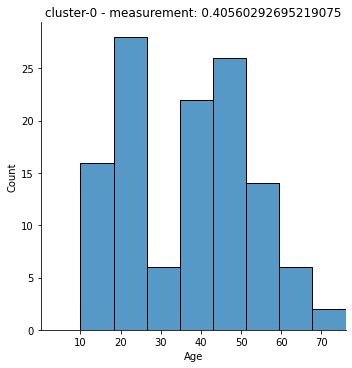

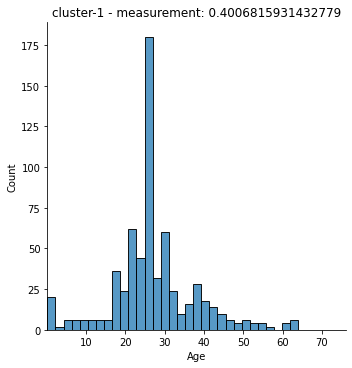

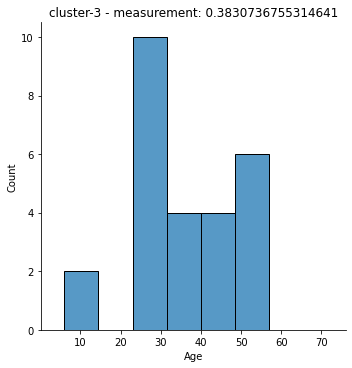

In [37]:
from scipy.stats import skew, variation


viz_ops.plot_distributions(
    numeric_field="Age", dataset_id="titanic", measure_function=variation, top_indices=3
)


  0%|          | 0/5 [00:00<?, ?it/s]

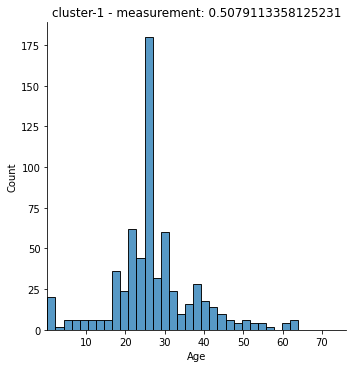

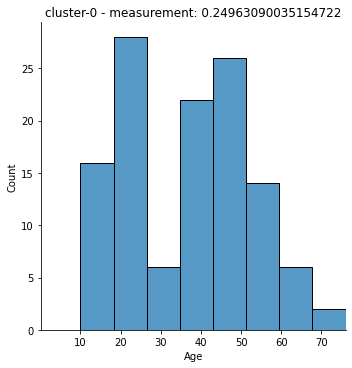

In [36]:

viz_ops.plot_distributions(
    numeric_field="Age", dataset_id="titanic", measure_function=skew, top_indices=2
)
